In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn. preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("avocado.csv")

In [4]:
df["Date"].dtype
df.tail(1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
# make a copy of original dataset before changing anything
orig_df = df[:]

In [6]:
# delete "Unnamed: 0"
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df.columns
df = df[['Date','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region','Total Volume','AveragePrice',]]
df.head(2)

,Date,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume,AveragePrice
0,2015-12-27,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,64236.62,1.33
1,2015-12-20,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,54876.98,1.35


In [8]:
df["Profit"] = df['Total Volume'] * df["AveragePrice"]
df.head()

,Date,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume,AveragePrice,Profit
0,2015-12-27,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,64236.62,1.33,85434.7046
1,2015-12-20,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,54876.98,1.35,74083.9230
2,2015-12-13,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,118220.22,0.93,109944.8046
3,2015-12-06,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,78992.15,1.08,85311.5220
4,2015-11-29,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,51039.60,1.28,65330.6880


In [9]:
# convert to_datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Date'].reset_index().head()

,index,Date
0,0,2015-12-27
1,1,2015-12-20
2,2,2015-12-13
3,3,2015-12-06
4,4,2015-11-29


In [10]:
# changed 4046 to PLU_4046, personal referece (no int in column name)
name_dict = {
    '4046' : 'PLU_4046',
    '4225' : 'PLU_4225',
    '4770' : 'PLU_4770',
}
df = df.rename(columns=name_dict)
df.head(1)
# orig_df

,Date,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume,AveragePrice,Profit
0,2015-12-27,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,64236.62,1.33,85434.7046


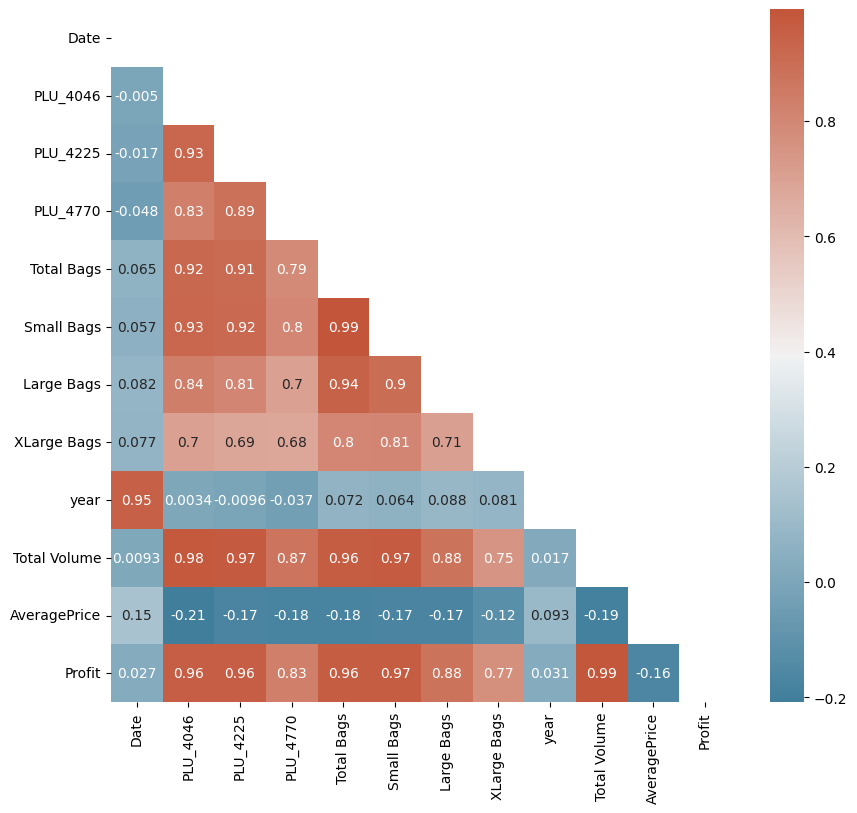

In [11]:
def get_heat_map_corr(corr_df, figsize=(10, 9), remove_cols=[], corr_method='pearson', title=None):

    df_temp = corr_df
    for i in remove_cols:
        try:
            df_temp = df_temp.drop(i,axis=1)
        except:
            print(f'column {i} not found')
    
    for c in df_temp.columns:
        if df_temp[c].dtype == 'object':
            df_temp = df_temp.drop(c,axis=1)

    corr = df_temp.corr(method=corr_method)

    f, ax = plt.subplots(figsize=figsize)

    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    if title != None:
        plt.title(title)

    # sns.heatmap(corr, annot=True, cmap=cmap)
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
get_heat_map_corr(df)

In [12]:
def get_correlation(df, target_col, cols, sort=False):
    corr_dict = {}
    for i in cols:
        correlation = target_col.corr(df[i])
        corr_dict[i] = correlation

    if sort:
        corr_dict = dict(sorted(corr_dict.items(), key=lambda x: x[1], reverse=True))
    return corr_dict


temp_df = df[:]
cols_to_label = ['type', 'region', ]
label = LabelEncoder()
for c in cols_to_label:
    label.fit(temp_df[c].drop_duplicates())
    temp_df[c] = label.transform(temp_df[c])

target_col = temp_df['Total Volume']
target_col = temp_df['Profit']
cols = [
    'PLU_4046','PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region','AveragePrice',
]
get_correlation(temp_df, target_col, cols, sort=True)
# df

{'Small Bags': 0.9661153068475289,
 'Total Bags': 0.9618774161584233,
 'PLU_4225': 0.9594479648701483,
 'PLU_4046': 0.9576636612379311,
 'Large Bags': 0.8776538099109633,
 'PLU_4770': 0.8329751484403387,
 'XLarge Bags': 0.7704871298581129,
 'region': 0.1707626504716377,
 'year': 0.030644719620815032,
 'AveragePrice': -0.16306069552104543,
 'type': -0.2314749679843403}

Text(0.5, 1.0, 'AveragePrice')

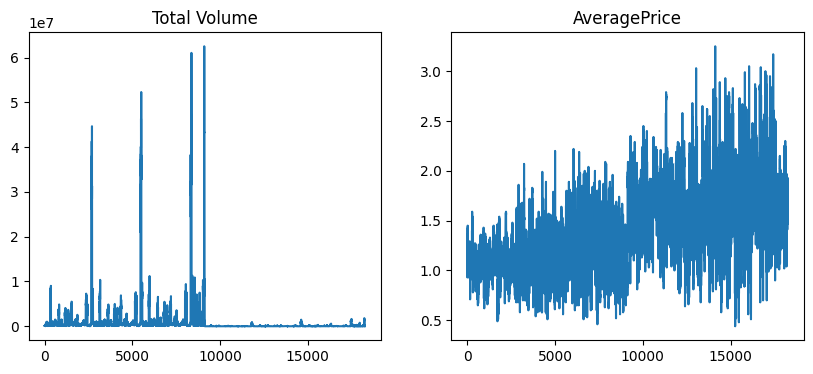

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].plot(df['Total Volume'].index, df['Total Volume'])
axes[0].set_title('Total Volume')

axes[1].plot(df['AveragePrice'].index, df['AveragePrice'])
axes[1].set_title('AveragePrice')

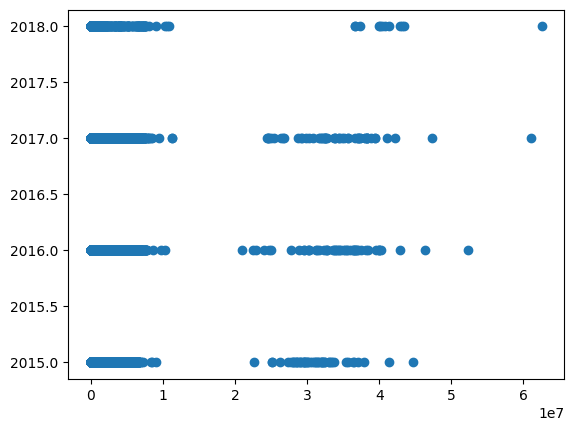

In [14]:
plt.scatter(df['Total Volume'],df['year'])
# plt.scatter(df['Total Volume'],df['Date'])


In [15]:
for c in df.columns:
    print(df[c].isnull().sum(), c)

0 Date
0 PLU_4046
0 PLU_4225
0 PLU_4770
0 Total Bags
0 Small Bags
0 Large Bags
0 XLarge Bags
0 type
0 year
0 region
0 Total Volume
0 AveragePrice
0 Profit


In [16]:
for c in df.columns:
    print( c, df[c].nunique(), df[c].dtype )

Date 169 datetime64[ns]
PLU_4046 17702 float64
PLU_4225 18103 float64
PLU_4770 12071 float64
Total Bags 18097 float64
Small Bags 17321 float64
Large Bags 15082 float64
XLarge Bags 5588 float64
type 2 object
year 4 int64
region 54 object
Total Volume 18237 float64
AveragePrice 259 float64
Profit 18249 float64


In [17]:
str_filt = df['region'].str.contains("total", case=False)
df[str_filt]['region'].nunique()

1

In [18]:
reqion_sort_df = df.groupby('region')
reqion_sort_df.value_counts()

reqions = set(df['region'])
reqions

smallest = reqion_sort_df['Profit'].sum().nsmallest(30)
largest = reqion_sort_df['Profit'].sum().nlargest(30)

print("top 5 selling regions: ")
print(largest.head(6)[1:])
print()
print("top 5 low selling regions: ")
print(smallest.head(5))

# for i in df['region']:
    # print(i)

top 5 selling regions: 
region
California      1.121414e+09
West            1.066834e+09
Northeast       9.600079e+08
SouthCentral    8.740593e+08
Southeast       7.036306e+08
Name: Profit, dtype: float64

top 5 low selling regions: 
region
Syracuse      1.520519e+07
Boise         1.534667e+07
Spokane       1.715649e+07
Louisville    1.749555e+07
Albany        2.176672e+07
Name: Profit, dtype: float64


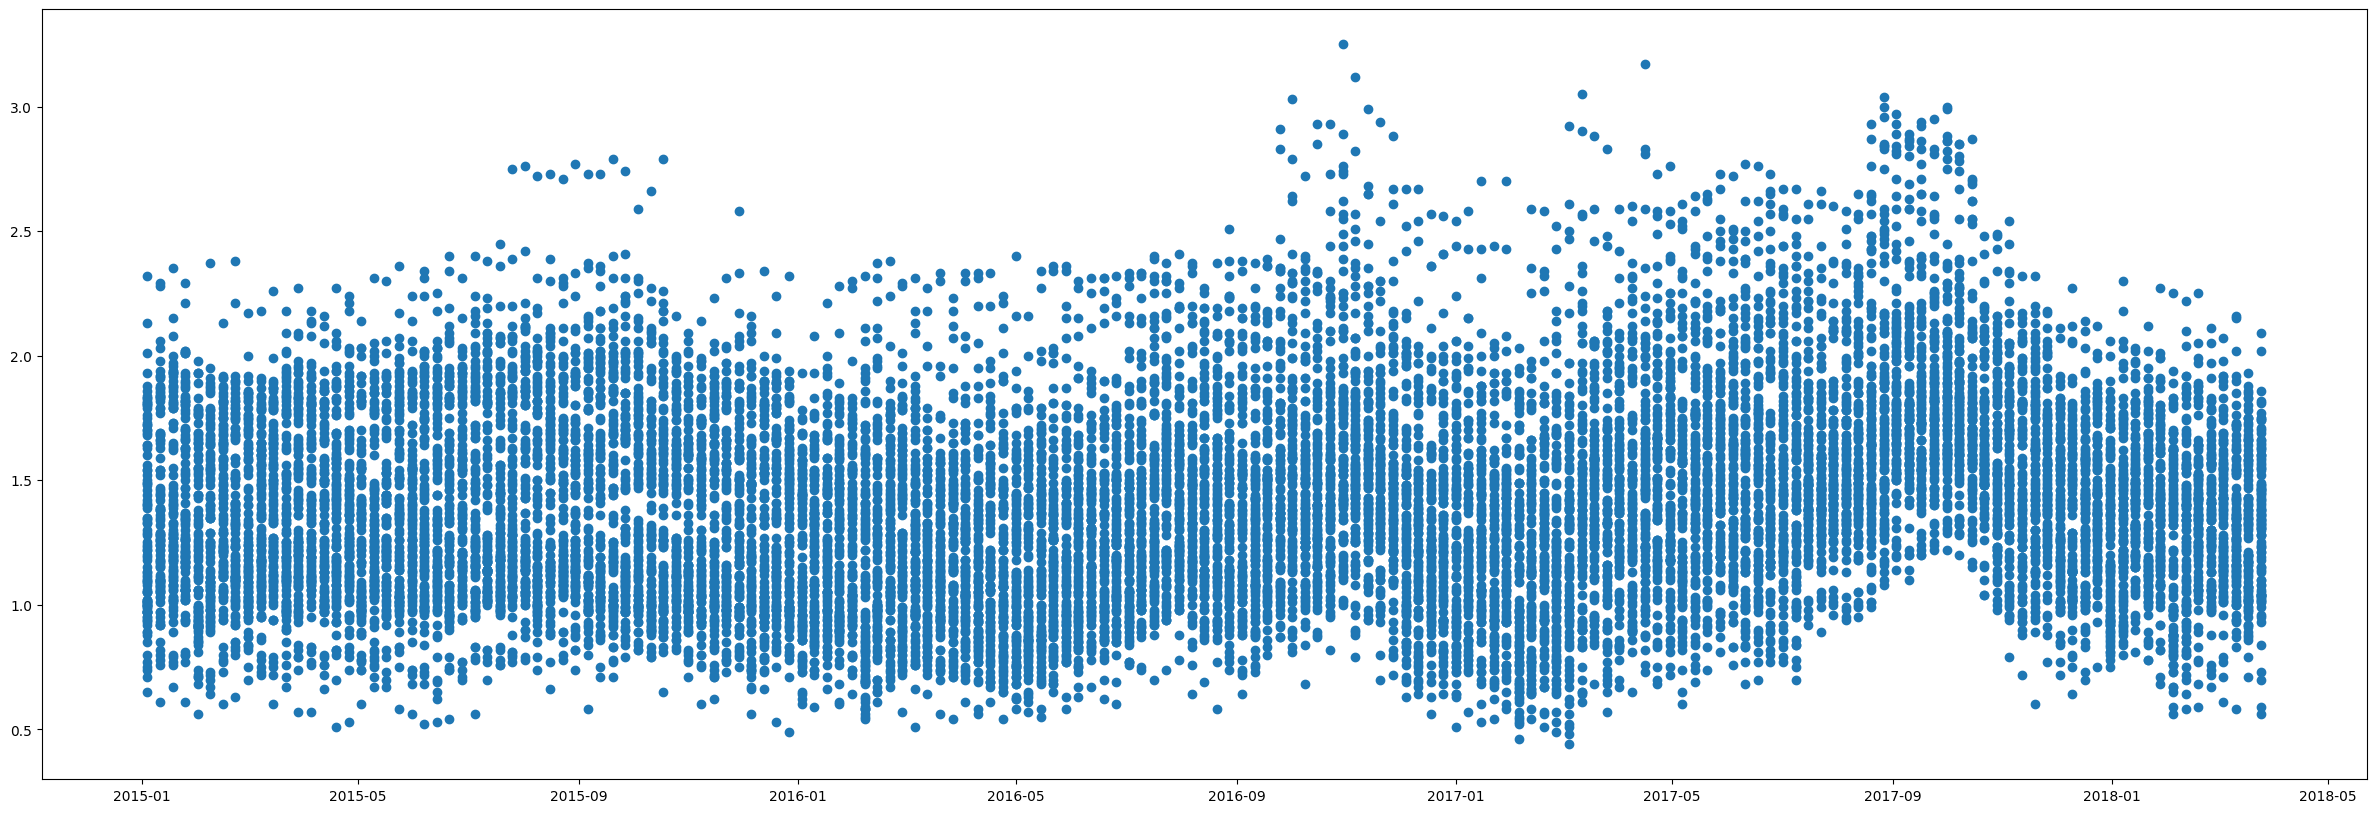

In [19]:
plt.figure(figsize=(30,10))
plt.scatter(df['Date'], df['AveragePrice'])
# plt.scatter(df['Date'], df['Profit'])

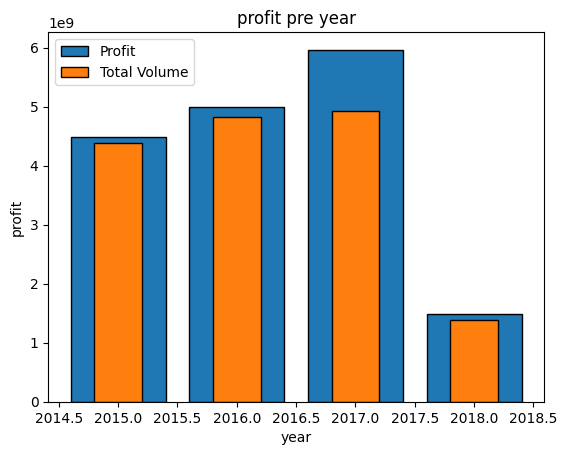

In [20]:
year_grop = df.groupby('year')
year_grop.value_counts()

years = set(df['year'])
years = list(years)
years = sorted(years)
profit_by_year = [year_grop.get_group(y)['Profit'].sum() for y in years]
vol_by_year = [year_grop.get_group(y)['Total Volume'].sum() for y in years]
# avg_price_by_year = [year_grop.get_group(y)['AveragePrice'].sum() for y in years]

# plt.xticks(years, years)

plt.bar(years, profit_by_year, label="Profit", edgecolor='black')
plt.bar(years, vol_by_year, width=.4,label="Total Volume", edgecolor='black')
# plt.bar(years, avg_price_by_year, width=.4,label="AveragePrice")

plt.xlabel("year")
plt.ylabel("profit")
plt.title("profit pre year")
plt.legend()
# df

In [21]:
year = 2018
yg = year_grop.get_group(year)['Date']
min, max = yg.min(), yg.max()

print(f"min for {year} {min}")
print(f"max for {year} {max}")
print(f"diff    {max - min}")

min for 2018 2018-01-07 00:00:00
max for 2018 2018-03-25 00:00:00
diff    77 days 00:00:00


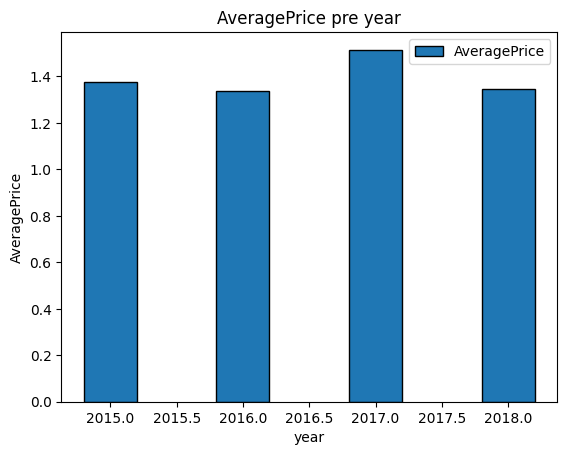

In [22]:
year_grop = df.groupby('year')
year_grop.value_counts()

avg_price_by_year = [year_grop.get_group(y)['AveragePrice'].mean() for y in years]

# plt.xticks(years, years)

plt.bar(years, avg_price_by_year, width=.4,label="AveragePrice", edgecolor='black')

plt.xlabel("year")
plt.ylabel("AveragePrice")
plt.title("AveragePrice pre year")
plt.legend()
# df

[1.37559038e+09 1.33863960e+09 1.51512758e+09 1.34753086e+09]


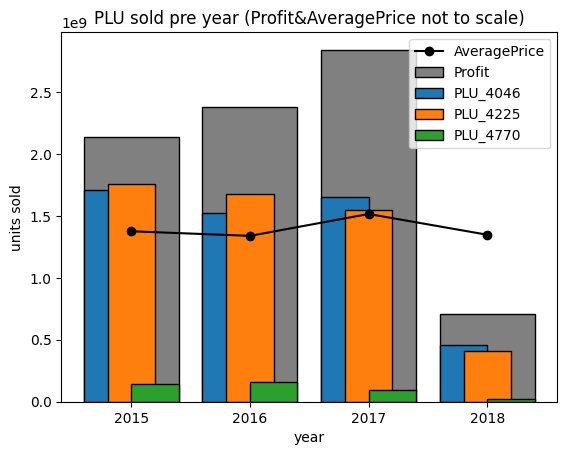

In [23]:
PLU_4046_sum = [year_grop.get_group(y)['PLU_4046'].sum() for y in years]
PLU_4225_sum = [year_grop.get_group(y)['PLU_4225'].sum() for y in years]
PLU_4770_sum = [year_grop.get_group(y)['PLU_4770'].sum() for y in years]
profit = [year_grop.get_group(y)['Profit'].sum() for y in years]
# profit = [year_grop.get_group(y)['Total Volume'].sum() for y in years]
avg_price_by_year = [year_grop.get_group(y)['AveragePrice'].mean() for y in years]


# x= np.arange(min(years), max(years)  )
x = list(range(len(years)))
x = np.arange(len(years))

avg_price_by_year = np.array(avg_price_by_year)*1000000000
print(avg_price_by_year)
plt.plot(x, avg_price_by_year, '-o', color='black', label="AveragePrice")
# plt.bar(x, avg_price_by_year, width=.5, label="avg_price_by_year", alpha=.8, color='black')

profit = np.array(profit)/2.1
plt.bar(x, profit, label="Profit", alpha=1, color='grey', edgecolor='black')

offset = .2
plt.bar(x-offset, PLU_4046_sum, width=.4, alpha=1, label="PLU_4046", edgecolor='black')
plt.bar(x, PLU_4225_sum, width=.4, alpha=1, label="PLU_4225", edgecolor='black')
plt.bar(x+offset, PLU_4770_sum, width=.4, alpha=1, label="PLU_4770", edgecolor='black')

# rename x
plt.xticks(x, years)

plt.xlabel("year")
plt.ylabel("units sold")
plt.title("PLU sold pre year (Profit&AveragePrice not to scale)")
plt.legend()
# df

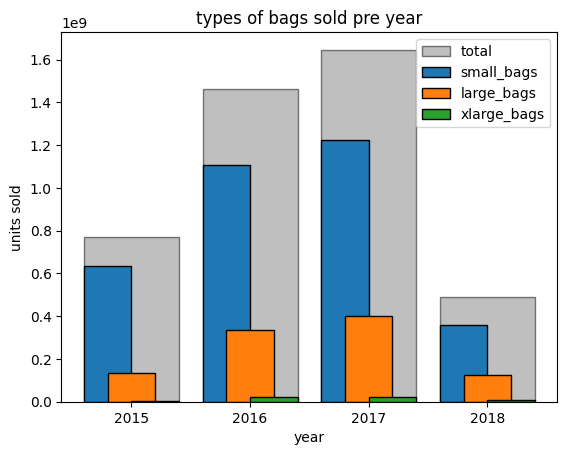

In [24]:
small_bags = [year_grop.get_group(y)['Small Bags'].sum() for y in years]
large_bags = [year_grop.get_group(y)['Large Bags'].sum() for y in years]
xlarge_bags = [year_grop.get_group(y)['XLarge Bags'].sum() for y in years]
total = [year_grop.get_group(y)['Total Bags'].sum() for y in years]

# x= np.arange(min(years), max(years)  )
x = list(range(len(years)))
x = np.arange(len(years))

plt.bar(x, total, label="total", alpha=.5, color='grey', edgecolor='black')

offset = .2
plt.bar(x-offset, small_bags, width=.4, alpha=1, label="small_bags", edgecolor='black')
plt.bar(x, large_bags, width=.4, alpha=1, label="large_bags", edgecolor='black')
plt.bar(x+offset, xlarge_bags, width=.4, alpha=1, label="xlarge_bags", edgecolor='black')

# rename x
plt.xticks(x, years)

plt.xlabel("year")
plt.ylabel("units sold")
plt.title("types of bags sold pre year")
plt.legend()
# df

In [25]:
# type = [year_grop.get_group(y)['type'].sum() for y in years]
conventional = []
organic = []
for y in years:
    type_sum = year_grop.get_group(y)['type'].value_counts()
    # print(type_sum)
    # print(type_sum.index[0], type_sum.values[0])
    # print(type_sum.index[1], type_sum.values[1])
    conventional.append(type_sum.values[0])
    organic.append(type_sum.values[1])

conventional = np.array(conventional)
organic = np.array(organic)
diff = conventional - organic
years

# plt.bar(x-offset, conventional, width=.4, alpha=1, label="conventional")
# plt.bar(x+offset, organic, width=.4, alpha=1, label="organic")

# # rename x
# plt.xticks(x, years)

# plt.xlabel("year")
# plt.ylabel("units sold")
# plt.title("types sold pre year")
# plt.legend()
# # df

[2015, 2016, 2017, 2018]

In [26]:
df[['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].tail(20)

excess_bags_cols = ['Small Bags', 'Large Bags', 'XLarge Bags']
for i in excess_bags_cols:
    df.drop(i,axis=1, inplace=True)
# df

In [27]:
cols_to_label = ['type', 'region', ]

label = LabelEncoder()

for c in cols_to_label:
    label.fit(df[c].drop_duplicates())
    df[c] = label.transform(df[c])
df

,Date,PLU_4046,PLU_4225,PLU_4770,Total Bags,type,year,region,Total Volume,AveragePrice,Profit
0,2015-12-27,1036.74,54454.85,48.16,8696.87,0,2015,0,64236.62,1.33,85434.7046
1,2015-12-20,674.28,44638.81,58.33,9505.56,0,2015,0,54876.98,1.35,74083.9230
2,2015-12-13,794.70,109149.67,130.50,8145.35,0,2015,0,118220.22,0.93,109944.8046
3,2015-12-06,1132.00,71976.41,72.58,5811.16,0,2015,0,78992.15,1.08,85311.5220
4,2015-11-29,941.48,43838.39,75.78,6183.95,0,2015,0,51039.60,1.28,65330.6880
...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,2046.96,1529.20,0.00,13498.67,1,2018,53,17074.83,1.63,27831.9729
18245,2018-01-28,1191.70,3431.50,0.00,9264.84,1,2018,53,13888.04,1.71,23748.5484
18246,2018-01-21,1191.92,2452.79,727.94,9394.11,1,2018,53,13766.76,1.87,25743.8412
18247,2018-01-14,1527.63,2981.04,727.01,10969.54,1,2018,53,16205.22,1.93,31276.0746


In [28]:
# x = df.drop(['Date','Profit', 'Total Volume'],axis=1)
x = df.drop(['Date','Profit'],axis=1)
# x
y = df.iloc[:,-1]
# y

In [29]:
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3,random_state=42)

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

y_pred = lin_model.predict(x_test)
lin_model.predict(x_test)
print(f"score              {lin_model.score(x_test,y_test)} ")
print(f"mean_squared_error {mean_squared_error(y_test, y_pred)} ")

score              0.972950773320428 
mean_squared_error 371078707562.76666 


In [30]:
data = {}
for indx, col_name in enumerate(x_train):
    data[col_name] = lin_model.coef_[indx]
data = dict(sorted(data.items(), key=lambda x: x[1],reverse=True))
data

{'AveragePrice': 351977.96279572253,
 'Total Volume': 154.71901949368623,
 'Total Bags': -153.24684965708065,
 'PLU_4225': -153.45580037002802,
 'PLU_4046': -153.87810271302234,
 'PLU_4770': -157.60700210342685,
 'region': -1220.931713200205,
 'year': -2643.9922837562344,
 'type': -190656.52605228894}